# ANALISI ESERCIZIO 10


In [7]:
import numpy as np                                                                 
import matplotlib.pyplot as plt    

## ESERCIZIO 10.1

Il mio algoritmo di Simulated Annealing comprende un modo per far convergere l'algoritmo. Ogni volta che viene testata una nuova temperatura viene verificato che L1 della precedente sia cambiato sensibilmente, se non succede l'algoritmo si ferma. La temperatura viene scalata di un ordine 10 e vengono eseguite 1000 passi Metropolis.

## CIRCLE 32 CITIES

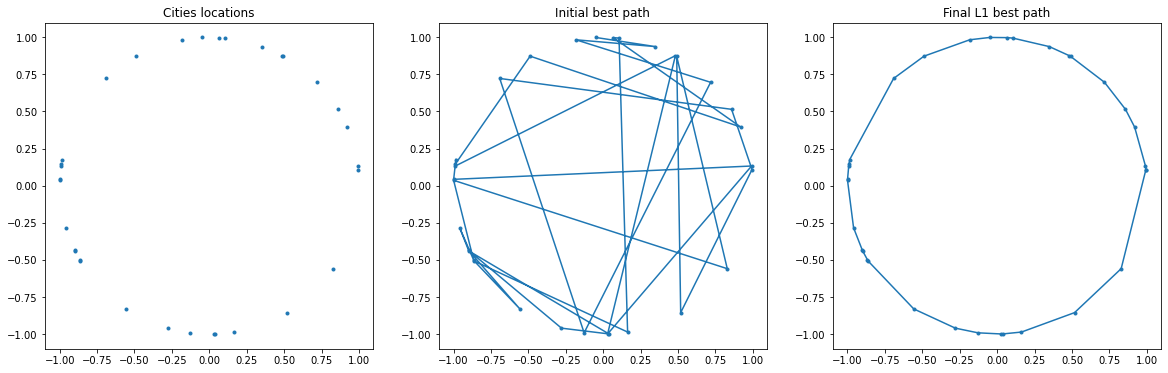

In [11]:
x=np.loadtxt("Esercizio10_1/outputs/city_circle.dat")                            
fig,ax = plt.subplots(1,3, figsize=(20, 6))

ax[0].plot(x[:,0], x[:,1], marker=".", linestyle="");
ax[0].set_title("Cities locations");

initial=np.loadtxt("Esercizio10_1/outputs/circle_initial_best_path.dat",dtype="uint32")  
x_initial=x[initial,0]
y_initial=x[initial,1]
ax[1].plot(x_initial, y_initial, marker="."); 
ax[1].set_title("Initial best path");

final=np.loadtxt("Esercizio10_1/outputs/circle_new_best_path.dat",dtype="uint32")  
x_final=x[final,0]
x_final=np.append(x_final, x[final[0],0])
y_final=x[final,1]
y_final=np.append(y_final, x[final[0],1])
ax[2].plot(x_final, y_final, marker=".");  
ax[2].set_title("Final L1 best path");

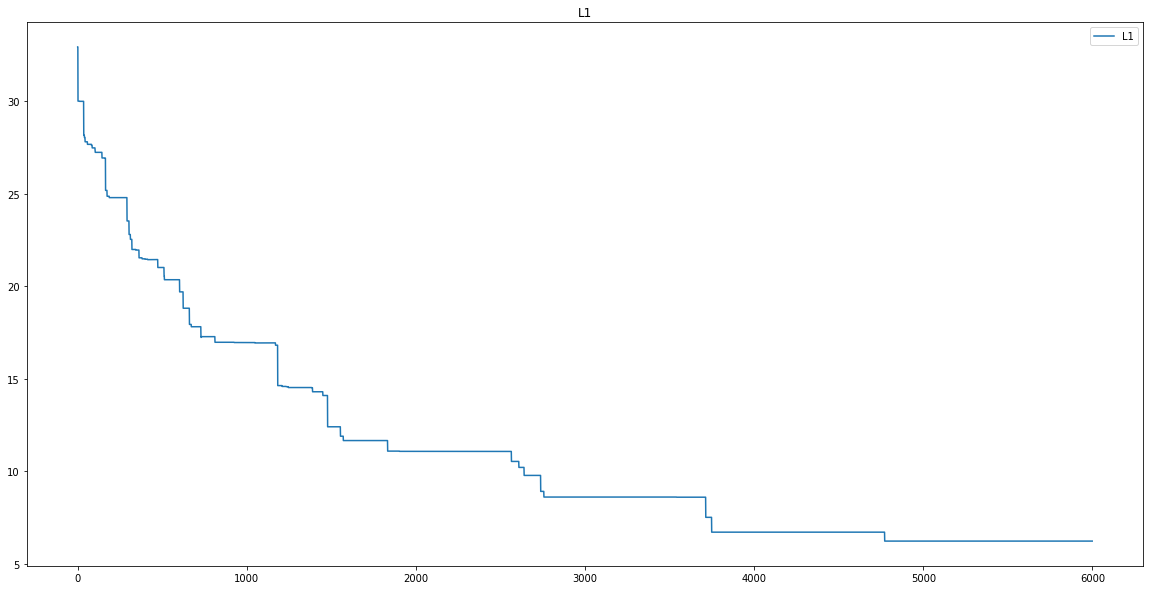

In [12]:
av=np.loadtxt("Esercizio10_1/outputs/circle_step.dat") 
plt.figure(figsize=(20,10));

plt.plot(av, label="L1")
plt.title("L1")
plt.legend()

## SQUARE 32 CITIES

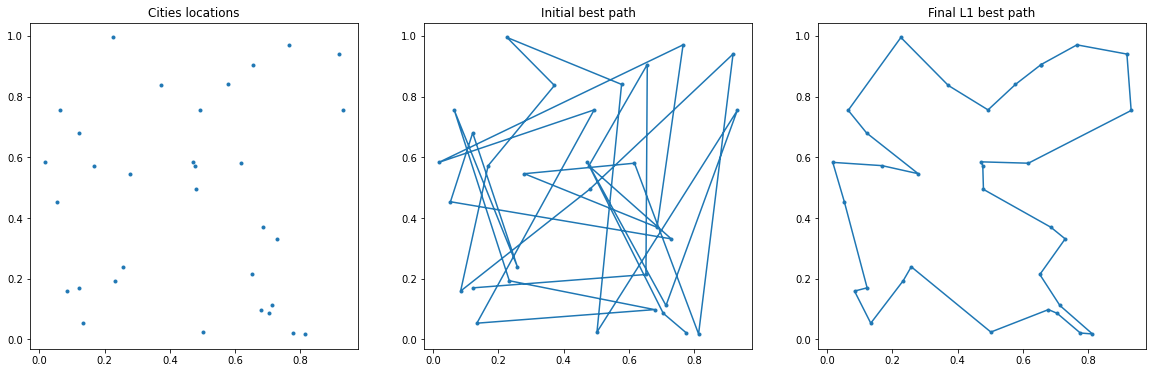

In [13]:
x=np.loadtxt("Esercizio10_1/outputs/city_square.dat")                            
fig,ax = plt.subplots(1,3, figsize=(20, 6))

ax[0].plot(x[:,0], x[:,1], marker=".", linestyle="");
ax[0].set_title("Cities locations");

initial=np.loadtxt("Esercizio10_1/outputs/square_initial_best_path.dat",dtype="uint32")  
x_initial=x[initial,0]
y_initial=x[initial,1]
ax[1].plot(x_initial, y_initial, marker="."); 
ax[1].set_title("Initial best path");

final=np.loadtxt("Esercizio10_1/outputs/square_new_best_path.dat",dtype="uint32")  
x_final=x[final,0]
x_final=np.append(x_final, x[final[0],0])
y_final=x[final,1]
y_final=np.append(y_final, x[final[0],1])
ax[2].plot(x_final, y_final, marker=".");  
ax[2].set_title("Final L1 best path");

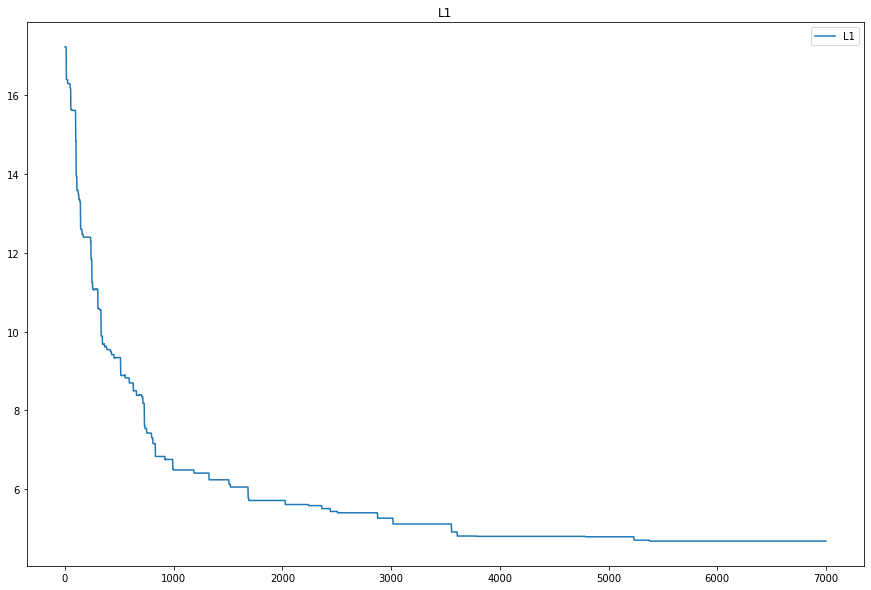

In [5]:
best=np.loadtxt("Esercizio10_1/outputs/square_step.dat")

plt.figure(figsize=(15,10));

plt.plot(best,label="L1")
plt.title("L1")
plt.legend()


## ESERCIZIO 10.2

Per questo esercizio ho modificato il modo in cui funziona l'algoritmo di Simulated Annealing. Non ho più una convergenza all'interno di esso bensì alla fine di ogni temperatura calcolo il nuovo migliore percorso tra i thread e scambio questo percorso con altri thread. 

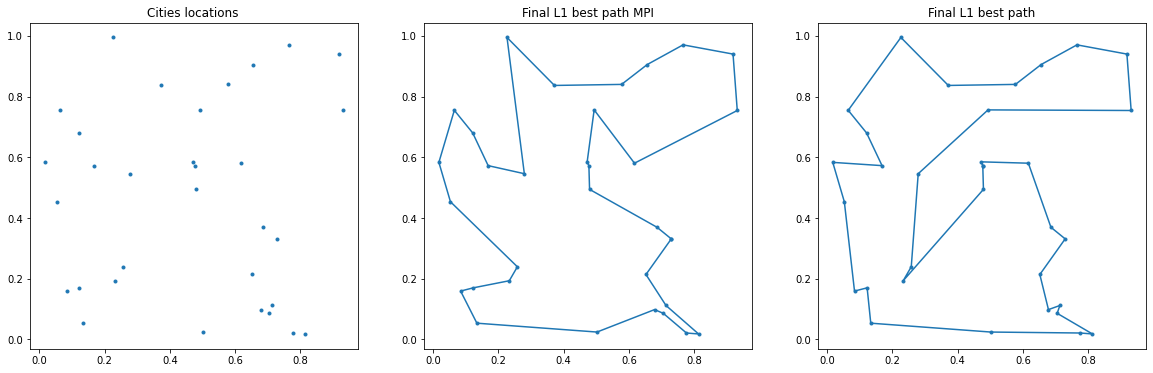

In [6]:
x=np.loadtxt("Esercizio10_2/outputs/city_square.dat")
y=np.loadtxt("../Esercizio_9/Esercizio9_1/outputs/city_square.dat")
fig,ax = plt.subplots(1,3, figsize=(20, 6))

ax[0].plot(x[:,0], x[:,1], marker=".", linestyle="");
ax[0].set_title("Cities locations ");

final=np.loadtxt("Esercizio10_2/outputs/square_new_best_path.dat",dtype="uint32")  
x_final=x[final,0]
x_final=np.append(x_final, x[final[0],0])
y_final=x[final,1]
y_final=np.append(y_final, x[final[0],1])
ax[1].plot(x_final, y_final, marker=".");  
ax[1].set_title("Final L1 best path MPI");

final1=np.loadtxt("../Esercizio_9/Esercizio9_1/outputs/square_new_best_path.dat",dtype="uint32")  
x_final1=y[final1,0]
x_final1=np.append(x_final1, y[final1[0],0])
y_final1=y[final1,1]
y_final1=np.append(y_final1, y[final1[0],1])
ax[2].plot(x_final1, y_final1, marker=".");  
ax[2].set_title("Final L1 best path");



In [13]:
best_mpi=np.loadtxt("Esercizio10_2/outputs/square_step.dat")
best_normal=np.loadtxt("../Esercizio_9/Esercizio9_1/outputs/best_square.dat")
print("L1 finale quadrato MPI:",best_mpi[len(best_mpi)-1])
print("L1 finale quadrato:",best_normal[len(best_normal)-1])

L1 finale quadrato MPI: 4.81063
L1 finale quadrato: 5.36836


Per uno stesso numero di generazioni, in questo caso 100, l'utilizzo delle isole ha migliorato sensibilmente il risultato della simulazione.